# Introduction to reconstruction

In [2]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from simulator import simulator

In [3]:
x0 = torch.tensor([0, 0])
v0 = torch.tensor([10, 10])

x = torch.cat((x0, v0))

In [4]:
x

tensor([ 0,  0, 10, 10])

In [5]:
y = simulator(x, t=3)

In [6]:
y

tensor([ 30.0000, -14.1450,  10.0000, -19.4300])

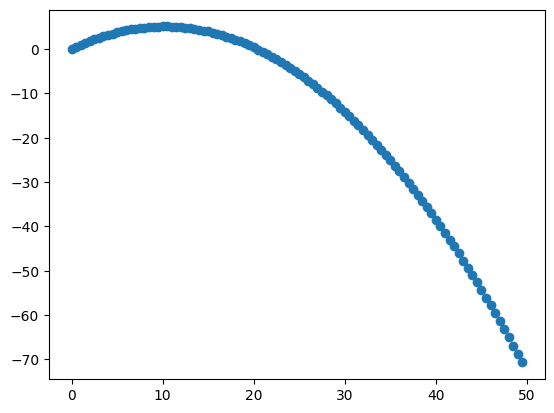

In [7]:
all_pos = []
for t in range(100):
    y = simulator(x, t=t/20)
    all_pos.append(y[:2].tolist())
all_pos = np.array(all_pos)

plt.scatter(all_pos[:, 0], all_pos[:, 1])

$\arg \min_x ||A(x) - b||_2^2$

In [8]:
b = simulator(x, t=3)

In [9]:
b

tensor([ 30.0000, -14.1450,  10.0000, -19.4300])

In [10]:
x = torch.tensor([0., 0., 0., 0.], requires_grad=True)
optimizer = torch.optim.SGD({x}, lr=1e-2)

training_loss = []
for epoch in range(100):

    Ax = simulator(x, t=3)
    loss = ((Ax - b)**2).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())

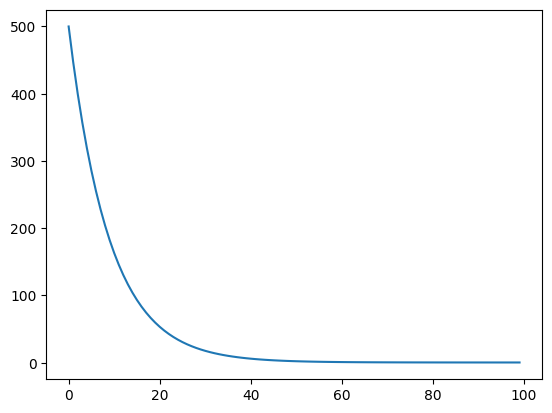

In [11]:
plt.plot(training_loss)

In [12]:
training_loss[-1]

0.3590232729911804

In [13]:
x

tensor([2.6390, 2.6390, 9.1643, 9.1643], requires_grad=True)

In [14]:
b

tensor([ 30.0000, -14.1450,  10.0000, -19.4300])